In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
start_time = time.time()

### Generating Data

In [3]:
# A simple function generating random predictors and responses!
def gen_data(start=2, end=100, step=2, add_noise=0):
    x = np.arange(start, end, step)
    y = 10 + 5*x
    
    if add_noise > 0:
        y = np.random.normal(y, add_noise)
        
    return x, y

### Cost Function

In [4]:
def cost_function(x, y, params):
    
    m = len(y)    
    
    squared_sum_of_errors = 0
    
    for i, xi in enumerate(np.nditer(x)):
        op = ((params[0] + params[1]*xi) - y[i])**2
        squared_sum_of_errors += op

    cost = squared_sum_of_errors/(2*m)
    
    return cost

### Function to calculate Sum of Errors (formula)

In [5]:
def calculate_sum_of_errors(x, y, params, with_xi = False):
    
    m = len(y)
    sum_of_errors = 0
    
    for i, xi in enumerate(np.nditer(x)):        
        if with_xi:
            op = ((params[0] + params[1]*xi) - y[i]) * xi
            sum_of_errors += op
        else:
            op = (params[0] + params[1]*xi) - y[i]
            sum_of_errors += op
    
    return sum_of_errors

### Gradient Descent Function

In [6]:
def gradient_descent(x, y, params, alpha, precision=0.5 , iterations=0):
    
    m = len(y)
    cost_history = list()
    first_iteration = True
    iterations = 0
    
    while True:
        
        sum_of_errors = calculate_sum_of_errors(x, y, params)
        sum_of_errors_xi = calculate_sum_of_errors(x, y, params, with_xi=True)
        
        temp0 = params[0] - alpha * 1/m * sum_of_errors
        temp1 = params[1] - alpha * 1/m * sum_of_errors_xi
                
        if np.isinf(temp0) or np.isinf(temp1):
            break
        
        params[0] = temp0
        params[1] = temp1
    
        curr_cost = cost_function(x, y, params)
                
#         print("theta0 = {} | theta1 = {} | curr_cost = {}".format(params[0],params[1], curr_cost))
            
        if curr_cost < precision:
            break
        
        
        if not(first_iteration) and (cost_history[-1] - curr_cost <= precision):
            break
        
        if first_iteration:
            first_iteration = False
    
        cost_history.append(curr_cost)
    
        iterations += 1
        
    return params, cost_history, iterations

### Intitializing the data variables

In [7]:
x, y = gen_data(start=2, end=100, add_noise=30)

In [8]:
x

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68,
       70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])

In [9]:
y

array([ 59.68189054,  10.06690256,   7.051263  ,  43.49760429,
        65.14607441, 131.74585889,  47.883685  ,  79.25456658,
        95.452657  , 124.88620707, 114.34868176, 103.46404701,
       136.19860449, 168.60253803, 247.73006604, 164.34131165,
       180.33060493, 172.47844121, 220.40166549, 152.63122663,
       250.98579549, 249.34233149, 244.92957056, 242.22062951,
       219.17243613, 240.55701514, 278.16939483, 245.39316836,
       291.76508915, 295.64548557, 317.93834421, 334.38443115,
       408.33930078, 337.32310095, 352.66650415, 348.30147244,
       361.39023844, 354.89159173, 417.4631769 , 363.94508266,
       420.96267313, 429.55799083, 453.94075791, 442.7405737 ,
       456.39451575, 482.62674572, 498.78831507, 450.27097084,
       485.51983858])

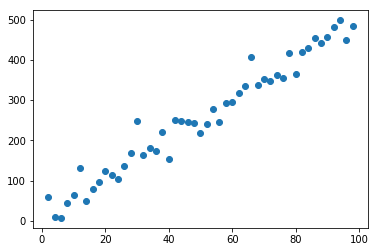

In [10]:
plt.scatter(x, y)

### Calculating cost on custom parameters

In [11]:
params = [1,1]
cost_function(x,y, params)

27631.55831609101

### Running the Gradient Descent

In [12]:
params = [1,1]
theta, cs, its = gradient_descent(x, y, params,precision=0.000001, alpha=0.0006)

In [13]:
print("theta0 = {} | theta1 = {}".format(theta[0], theta[1]))

theta0 = 13.501499672681922 | theta1 = 4.872345772746246


### Plotting the regression line on newly obtained parameters from Gradient Descent

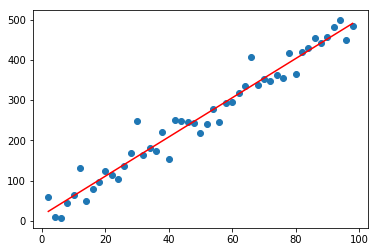

In [14]:
y_updated = theta[0] + theta[1]*x
plt.scatter(x, y)
plt.plot(x, y_updated, color='r')

### Adding an outlier - high leverage point

In [15]:
x = np.concatenate((x,[80]))

In [16]:
y = np.concatenate((y,[-300]))

In [17]:
params = [1,1]
theta, cs, its = gradient_descent(x, y, params,precision=0.000001, alpha=0.0006)


In [18]:
print("theta0 = {} | theta1 = {}".format(theta[0], theta[1]))

theta0 = 1.0050535506265084 | theta1 = 0.8671887551141317


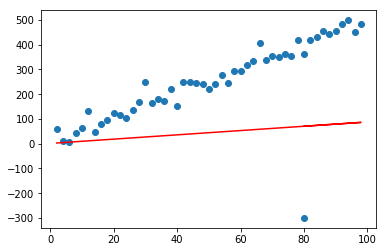

In [19]:
y_updated = theta[0] + theta[1]*x
plt.scatter(x, y)
plt.plot(x, y_updated, color='r')

In [20]:
print("Total time taken by program: {} seconds ".format((time.time() - start_time)))

Total time taken by program: 5.794374465942383 seconds 
